In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno, getWorkingHRDfParquet
import pandas as pd

appleHypnoDF = getWorkingHypnoDfParquet("apple").drop(["creationDate", "sourceVersion"], axis=1)
appleHypnoDF['startDate'] = appleHypnoDF.index

appleHRDf = getWorkingHRDfParquet('apple')
appleHRDf

                          hardware software              creationDate  value
sampleDT                                                                    
2021-07-19 19:55:06-07:00   Watch6      7.6 2021-07-19 19:55:07-07:00   78.0
2021-07-19 19:55:11-07:00   Watch6      7.6 2021-07-19 19:55:12-07:00   79.0
2021-07-19 19:55:14-07:00   Watch6      7.6 2021-07-19 19:55:17-07:00   80.0
2021-07-19 19:55:21-07:00   Watch6      7.6 2021-07-19 19:55:22-07:00   82.0
2021-07-19 19:55:23-07:00   Watch6      7.6 2021-07-19 19:55:27-07:00   83.0


,value
sampleDT,
2021-07-19 19:55:06-07:00,78.0
2021-07-19 19:55:11-07:00,79.0
2021-07-19 19:55:14-07:00,80.0
2021-07-19 19:55:21-07:00,82.0
2021-07-19 19:55:23-07:00,83.0
...,...
2024-08-27 18:45:33-07:00,79.0
2024-08-27 18:45:41-07:00,76.0
2024-08-27 18:45:45-07:00,76.0


In [9]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphHypnoandHRDate(hypnoDf, HRdf, forDate, deviceName, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate, cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)
    hypnoDfForDay = hypnoDf[(hypnoDf['startDate'] < graphTimeEnd) &
                            (hypnoDf['endDate'] > graphTimeStart)]


    #prepping hypno
    hypnoValues = []
    hypnoTimes = []
    for rowIndex in range(len(hypnoDfForDay)):
        hypnoTimes.append(hypnoDfForDay.iloc[rowIndex]['startDate'])
        hypnoValues.append(hypnoDfForDay.iloc[rowIndex]['value'])
        hypnoTimes.append(hypnoDfForDay.iloc[rowIndex]['endDate'])
        hypnoValues.append(hypnoDfForDay.iloc[rowIndex]['value'])
    
    # plotting Hypno
    fig, ax = plt.subplots(figsize=(16.0, 4.0))

    plt.gca().set_title("Sleep Stages and HR for " + deviceName + " for " + str(forDate))
    plt.gca().set_ylim([-1.3,3.3])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    xFormatter = plt.matplotlib.dates.DateFormatter('%H:%M', tz=pytz.timezone(timezone))
    plt.gca().xaxis.set_major_formatter(xFormatter)
    plt.ylabel("Sleep Stage")
    plt.xlabel("Time")

    legend1 = ax.plot(hypnoTimes, hypnoValues, label=deviceName, alpha=1, linewidth=1, color='b')
    legend2 = [
        ax.axhline(y = -1, color = 'k', linestyle = ':', linewidth=.7, label = "No Data"),
        ax.axhline(y = 0, color = 'c', linestyle = ':', linewidth=.7, label = "Awake"),
        ax.axhline(y = 1, color = 'm', linestyle = ':', linewidth=.7, label = "Light"),
        ax.axhline(y = 2, color = 'r', linestyle = ':', linewidth=.7, label = "Deep"),
        ax.axhline(y = 3, color = 'b', linestyle = ':', linewidth=.7, label = "REM") 
    ]
    legendToAdd = ax.legend(loc="upper left", handles=legend1)
    plt.legend(loc="upper right", handles=legend2[::-1])
    ax.add_artist(legendToAdd)

    # prepping HR
    HRdf['sampleDT'] = pd.to_datetime(HRdf.index)
    HRDfForDay = HRdf[(HRdf['sampleDT'] < graphTimeEnd) &
                      (HRdf['sampleDT'] > graphTimeStart)]

    HRTimes = [HRDfForDay.iloc[rowIndex]['sampleDT'] for rowIndex in range(len(HRDfForDay))]
    HRValues = [HRDfForDay.iloc[rowIndex]['value'] for rowIndex in range(len(HRDfForDay))]
    
    # plotting HR
    ax2 = ax.twinx()
    ax2.set_ylim([30,210])
    ax2.set_ylabel('Heart Rate', color='r') 
    ax2.plot(HRTimes, HRValues, color='r', linewidth=.7)

    plt.show()

In [8]:
appleDates = appleHypnoDF['startDate'].dt.date.unique()
print(len(appleDates))
appleDates[:10]

538


array([datetime.date(2022, 10, 1), datetime.date(2022, 10, 2),
       datetime.date(2022, 10, 3), datetime.date(2022, 10, 4),
       datetime.date(2022, 10, 5), datetime.date(2022, 10, 6),
       datetime.date(2022, 10, 7), datetime.date(2022, 10, 8),
       datetime.date(2022, 10, 9), datetime.date(2022, 10, 10)],
      dtype=object)

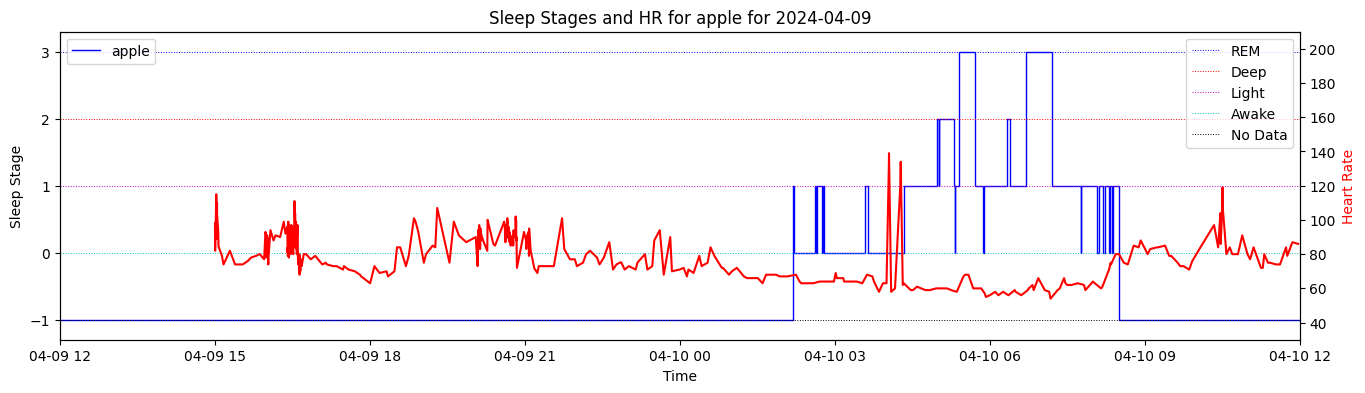

In [15]:
from datetime import date
graphHypnoandHRDate(appleHypnoDF, appleHRDf, date(2024,4,9), 'apple')

In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno, getWorkingHRDfParquet
import pandas as pd
fitbitHypnoDF = getWorkingHypnoDfParquet("fitbit")
fitbitHypnoDF['startDate'] = fitbitHypnoDF.index

fitbitHRDf = getWorkingHRDfParquet('fitbit')
fitbitHRDf

,value
sampleDT,
2021-06-18 16:07:22-07:00,90
2021-06-18 16:07:27-07:00,91
2021-06-18 16:07:42-07:00,83
2021-06-18 16:07:47-07:00,80
2021-06-18 16:08:02-07:00,81
...,...
2021-09-06 21:50:39-07:00,90
2021-09-06 21:50:49-07:00,92
2021-09-06 21:50:59-07:00,91


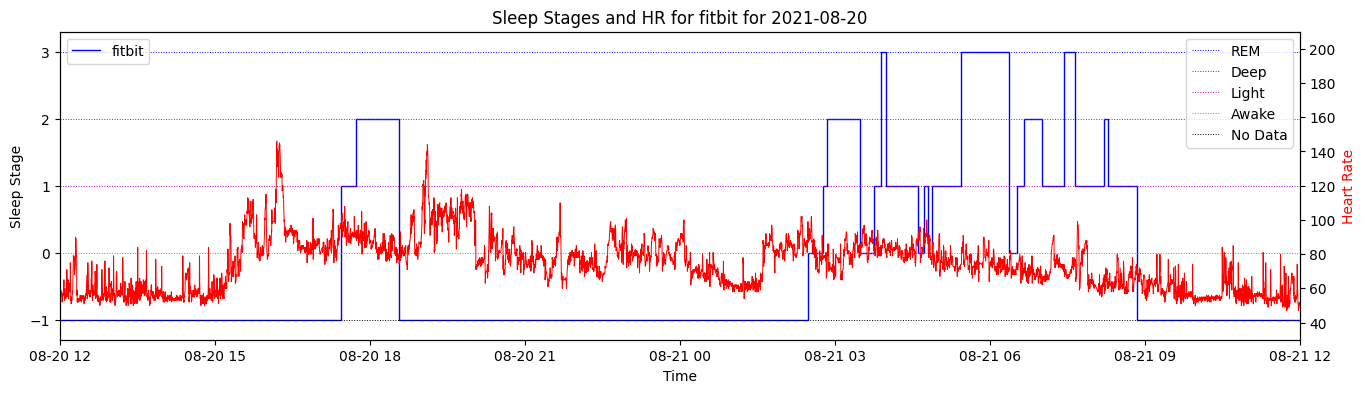

In [11]:
graphHypnoandHRDate(fitbitHypnoDF, fitbitHRDf, date(2021,8,20), 'fitbit')